In [17]:
import math
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt

**Задание 1. Моделирование отсчётов случайного процесса.**

Объявление параметров модели.

In [18]:
D = 5
alpha = 0.1
n = 150

Заданная ковариационная функция R(t).

In [19]:
def R(t):
    return D * math.exp(- alpha * abs(t))

Моделирование отсчётов случайного процесса по готовой формуле, полученной с помощью метода авторегрессии - скользящего среднего (ARMA).

In [20]:
def gen_x():
    np.random.seed(2023)
    
    x = np.random.normal(0, 1, n)
    a0 = math.sqrt(D * (1 - math.exp(- 2 * alpha)))
    b1 = math.exp(- alpha)

    res = [0.] * n
    res[0] = a0 * x[0]
    for j in range(1, n):
        res[j] = a0 * x[j] + b1 * res[j - 1]

    return res

In [21]:
X = gen_x()

Графическое представление отсчётов.

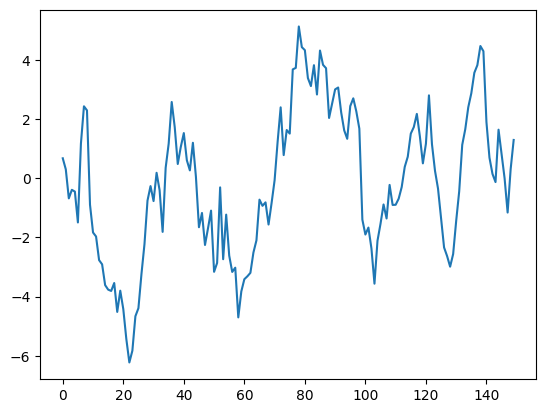

In [22]:
plt.plot(X)
plt.show()

Описательные статистики для временного ряда X:

In [23]:
S = pd.Series(X)
S.describe()

count    150.000000
mean      -0.167109
std        2.487432
min       -6.228947
25%       -1.951375
50%       -0.243290
75%        1.641934
max        5.135612
dtype: float64

Гистограмма для временного ряда X:

<AxesSubplot: >

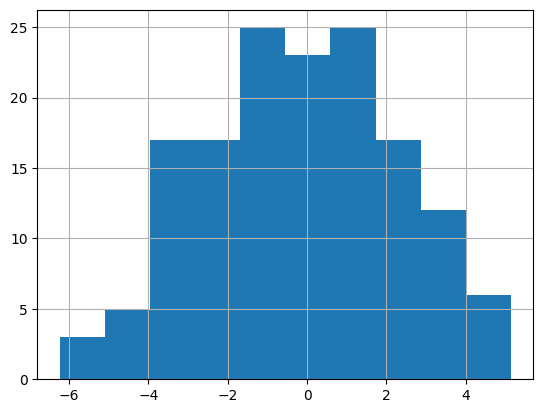

In [24]:
S.hist()

Проверка временного ряда X на нормальность распределения:

In [25]:
stat, p = sp.stats.normaltest(X) # Критерий согласия Пирсона
print('Statistics = %.3f, p-value = %.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности.')
else:
    print('Отклонить гипотезу о нормальности.')

Statistics=5.164, p-value=0.076
Принять гипотезу о нормальности
